In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
from math import cos, sin, pi
import copy

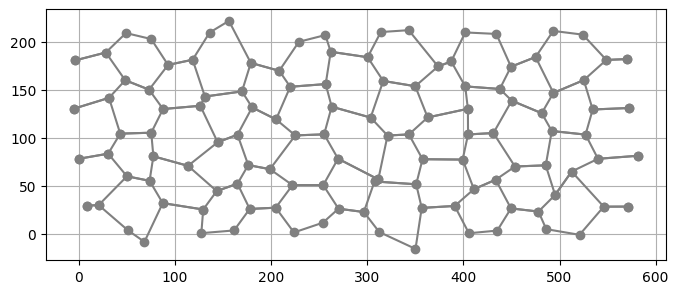

In [7]:
# Define the path to the threads file
threads_file_path = "C:/PROGRAMMING/optimize-gridding/outputfile.txt"

# Function to parse the threads file
def parse_threads(file_path):
    threads = {}
    current_thread = None

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Thread"):
                # Parse the thread number
                current_thread = int(line.split()[1][:-1])
                threads[current_thread] = []
            elif line and current_thread is not None:
                # Parse the (x, y) coordinates for the thread
                x, y = map(float, line.split(', '))
                threads[current_thread].append((x, y))
    
    return threads

def delete_last_line_of_threads(threads):
    for thread_num in threads:
        if threads[thread_num]:
            threads[thread_num].pop()  # Remove the last line (coordinate pair) from each thread
    return threads

# Parse the threads from the file
threads = parse_threads(threads_file_path)
# threads = delete_last_line_of_threads(threads) # if necessary


# Plot the threads
plt.figure(figsize=(8, 8))

for thread_id, points in threads.items():
    if points:
        # Separate x and y coordinates for plotting
        x_values, y_values = zip(*points)
        plt.plot(x_values, y_values, marker='o', label=f'Thread {thread_id}', color = 'grey')

# Final plot settings
# plt.title("Parsed Threads Plot")
# plt.xlabel("X Coordinates")
# plt.ylabel("Y Coordinates")
# plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

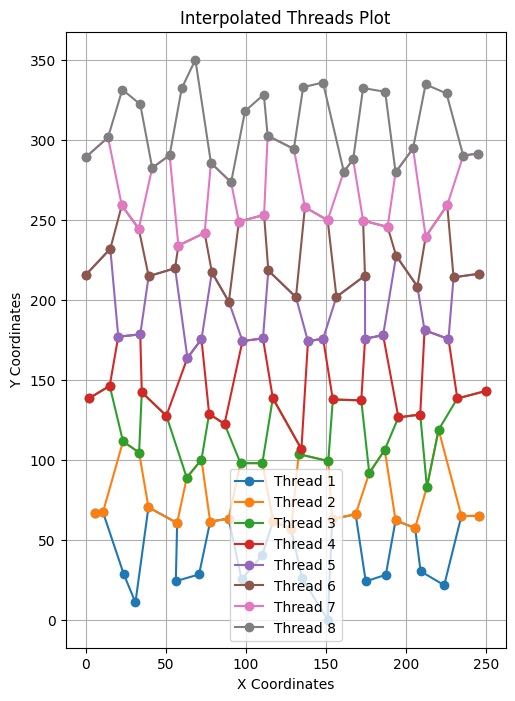

In [8]:
threads

# Interpolation target range
x_new_min, x_new_max = 0, 250
y_new_min, y_new_max = 0, 350

def get_min_max(threads):
    x_values = [x for thread_points in threads.values() for x, y in thread_points]
    y_values = [y for thread_points in threads.values() for x, y in thread_points]
    x_min, x_max = min(x_values), max(x_values)
    y_min, y_max = min(y_values), max(y_values)
    return x_min, x_max, y_min, y_max

def interpolate_points(threads, x_min, x_max, y_min, y_max, x_new_min, x_new_max, y_new_min, y_new_max):
    interpolated_threads = {}
    
    for thread_id, points in threads.items():
        interpolated_points = []
        for x, y in points:
            # Interpolate x and y values
            new_x = ((x - x_min) / (x_max - x_min)) * (x_new_max - x_new_min) + x_new_min
            new_y = ((y - y_min) / (y_max - y_min)) * (y_new_max - y_new_min) + y_new_min
            interpolated_points.append((new_x, new_y))
        
        # Store interpolated points for the thread
        interpolated_threads[thread_id] = interpolated_points
    
    return interpolated_threads

x_min, x_max, y_min, y_max = get_min_max(threads)

interpolated_threads = interpolate_points(threads, x_min, x_max, y_min, y_max, x_new_min, x_new_max, y_new_min, y_new_max)


plt.figure(figsize=(8, 8))

for thread_id, points in interpolated_threads.items():
    if points:
        # Separate x and y coordinates for plotting
        x_values, y_values = zip(*points)
        plt.plot(x_values, y_values, marker='o', label=f'Thread {thread_id}')

# Final plot settings
plt.title("Interpolated Threads Plot")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Processing Point 0: P1 = (8.108781642471884, 29.588675719172233), P2 = (20.479529185483635, 30.132763671731517), distance = 12.382706750668508, ang = 0.043953490226981355
Processing Point 1: P1 = (20.479529185483635, 30.132763671731517), P2 = (50.93468905819981, 3.9019005394249824), distance = 40.19421529944949, ang = -0.7110146951163184
Processing Point 2: P1 = (50.93468905819981, 3.9019005394249824), P2 = (68.09744083208601, -8.093101609803869), distance = 20.93896188955027, ang = -0.6099855636886333
Processing Point 3: P1 = (68.09744083208601, -8.093101609803869), P2 = (87.15790754734809, 32.20207647333688), distance = 44.575809226032455, ang = 1.128963888707046
Processing Point 4: P1 = (87.15790754734809, 32.20207647333688), P2 = (129.24154014366184, 25.549261434299638), distance = 42.60624461795666, ang = -0.15678806259983818
Processing Point 5: P1 = (129.24154014366184, 25.549261434299638), P2 = (127.30719752412371, 0.9418454086175443), distance = 24.683326453919406, ang = -1.649

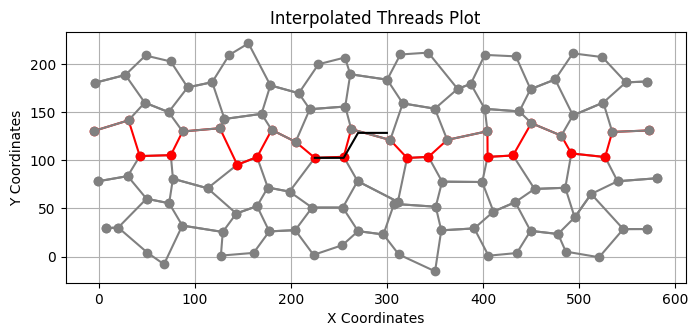

In [11]:
interpolated_threads = threads # overrides interpolation/extrapolation

# Loop over the points in the first thread
first_thread = interpolated_threads[1]  # Assuming thread 1 is the first one to process

for i in range(len(first_thread) - 1):
    # Get the current point and the next point in the thread
    P1 = first_thread[i]
    P2 = first_thread[i + 1]

    # Calculate distances or angles between the points if necessary
    # You can fill in your own logic here
    x1, y1 = P1
    x2, y2 = P2

    theta = math.atan2(y2-y1, x2-x1)

    # Example: Calculate the distance between P1 and P2 (you can change this part)
    distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    # Output for debugging purposes
    print(f"Processing Point {i}: P1 = {P1}, P2 = {P2}, distance = {distance}, ang = {theta}" )
    # You can replace this with your logic

# You can continue the loop or apply more transformations after the loop finishes.
BaseThread = int(len(interpolated_threads)/2 + 1)
CurrThread = interpolated_threads[BaseThread]
BasePoint = int(len(CurrThread)/2-3)
CurrThread[BasePoint]

length = 30
VisPoints = [CurrThread[BasePoint], [CurrThread[int(BasePoint)][0]+length, CurrThread[BasePoint][1]],
             [CurrThread[BasePoint][0]+length*(1+cos(pi/3)), CurrThread[BasePoint][1]+ length*sin(pi/3)],
             [CurrThread[BasePoint][0]+length*(2+cos(pi/3)), CurrThread[BasePoint][1]+ length*sin(pi/3)]]

plt.figure(figsize=(8, 8))

for thread_id, points in interpolated_threads.items():
    if points:
        # Separate x and y coordinates for plotting
        x_values, y_values = zip(*points)
        if thread_id == BaseThread:
            plt.plot(x_values, y_values, marker='o', label=f'Thread {thread_id}', color = 'red')
        else:
            plt.plot(x_values, y_values, marker='o', label=f'Thread {thread_id}', color = 'grey')

x_values = [point[0] for point in VisPoints]
y_values = [point[1] for point in VisPoints]

plt.plot(x_values, y_values , label = 'Base Element of Correction', color = 'black')

# Final plot settings
plt.title("Interpolated Threads Plot")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
# plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#make a copy of interpolated threads
interpolated_threads_copy = copy.deepcopy(interpolated_threads)

In [12]:
def points_are_close(p1, p2, tol=1e-5):
    """Check if two points are close to each other within a specified tolerance."""
    return abs(p1[0] - p2[0]) < tol and abs(p1[1] - p2[1]) < tol

# Correction of BaseThread

for i in range(BasePoint, int(len(interpolated_threads[BaseThread])-1)):
    P1 = interpolated_threads[BaseThread][i]
    P2 = interpolated_threads[BaseThread][i+1]

    x1, y1 = P1
    x2, y2 = P2

    theta = math.atan2(y2-y1, x2-x1)
    leng = round(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))

    # Correction Loops    
    for j in range(len(interpolated_threads[BaseThread+1])):
        if points_are_close(interpolated_threads[BaseThread+1][j], P2, tol=1e-5):
            interpolated_threads[BaseThread+1][j] = (P1[0] + cos(theta) * leng, P1[1] + sin(theta) * leng)

    for j in range(len(interpolated_threads[BaseThread-1])):
        if points_are_close(interpolated_threads[BaseThread-1][j], P2, tol=1e-5):
            interpolated_threads[BaseThread-1][j] = (P1[0] + cos(theta) * leng, P1[1] + sin(theta) * leng)

    P2 = P1[0] + cos(theta) * leng, P1[1] + sin(theta) * leng
    # also change that for all points sharing the same coords
    interpolated_threads[BaseThread][i+1] = P2


# Reverse direction loop
for i in range(BasePoint, 0, -1):
    P1 = interpolated_threads[BaseThread][i]
    P2 = interpolated_threads[BaseThread][i - 1]

    x1, y1 = P1
    x2, y2 = P2

    theta = math.atan2(y2 - y1, x2 - x1)
    leng = round(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))

    # Correction Loops
    for j in range(len(interpolated_threads[BaseThread+1])):
        if points_are_close(interpolated_threads[BaseThread+1][j], P2, tol=1e-5):
            interpolated_threads[BaseThread+1][j] = (P1[0] + cos(theta) * leng, P1[1] + sin(theta) * leng)

    for j in range(len(interpolated_threads[BaseThread-1])):
        if points_are_close(interpolated_threads[BaseThread-1][j], P2, tol=1e-5):
            interpolated_threads[BaseThread-1][j] = (P1[0] + cos(theta) * leng, P1[1] + sin(theta) * leng)

    P2 = P1[0] + math.cos(theta) * leng, P1[1] + math.sin(theta) * leng
    # Update the point
    interpolated_threads[BaseThread][i - 1] = P2

# Functions for solving geometry

def easySolve(th1, th2, P1, P2, l1, l3):
    alpha, gamma = th1, th2 
    
    # Positionen von P3 und P4
    P3 = P1 + l1 * np.array([np.cos(alpha), np.sin(alpha)])
    P4 = P2 + l3 * np.array([np.cos(gamma), np.sin(gamma)])

    chasm = math.sqrt((P4[0] - P3[0])**2 + (P4[1] - P3[1])**2)
    
    return chasm%1

def solveChasm(th1, th2, P1, P2, l1, l3):

    loss = easySolve(th1, th2, P1, P2, l1, l3)
    lastloss = 0                    # necessary for signum
    th1fin, th2fin = th1, th2
    alterator = pi/90

    optimizer = abs(loss)

    while not (abs(loss - 0) < 1e-6 or abs(loss - 1) < 1e-6):
        if (lastloss>0.5 and loss <0.5) or (lastloss<0.5 and loss>0.5): # signum
            alterator = alterator / 2

        lastloss = loss             # change signum iteration step

        if loss < 0.5:                # closer to 1
            th1fin = (th1fin - alterator)%(2*pi)
            th2fin = (th2fin + alterator)%(2*pi)
            loss = easySolve(th1fin, th2fin, P1, P2, l1, l3)
        elif loss > 0.5:              # closer to 0
            th1fin = (th1fin + alterator)%(2*pi)
            th2fin = (th2fin - alterator)%(2*pi)
            loss = easySolve(th1fin, th2fin, P1, P2, l1, l3)

        optimizer = abs(loss)

    return th1fin%(2*pi), th2fin%(2*pi)

def solveInvertedChasm(th1, th2, P1, P2, l1, l3):

    loss = easySolve(th1, th2, P1, P2, l1, l3)
    lastloss = 0                    # necessary for signum
    th1fin, th2fin = th1, th2
    alterator = pi/90

    optimizer = abs(loss)

    while not (abs(loss - 0) < 1e-6 or abs(loss - 1) < 1e-6):
        if (lastloss>0.5 and loss <0.5) or (lastloss<0.5 and loss>0.5): # signum
            alterator = alterator / 2

        lastloss = loss             # change signum iteration step

        if loss < 0.5:                # closer to 1
            th1fin = (th1fin + alterator)%(2*pi)
            th2fin = (th2fin - alterator)%(2*pi)
            loss = easySolve(th1fin, th2fin, P1, P2, l1, l3)
        elif loss > 0.5:              # closer to 0
            th1fin = (th1fin - alterator)%(2*pi)
            th2fin = (th2fin + alterator)%(2*pi)
            loss = easySolve(th1fin, th2fin, P1, P2, l1, l3)

        optimizer = abs(loss)

    print('done')

    return th1fin%(2*pi), th2fin%(2*pi)


for k in range(BaseThread+1, len(interpolated_threads)+1):
    
    CurrentThread = interpolated_threads[k]

    if (k - BaseThread)%2 == 1:
        skip = BasePoint%4+3
        end = (len(CurrentThread)-skip)//4 * 4
        print('red')
    else:
        skip = (BasePoint%4-3)%4
        end = (len(CurrentThread)-skip)//4 * 4 + 0

    print(skip, end)

    i = skip

    while i < end:
        P1 = CurrentThread[i]
        P2 = CurrentThread[i+1]
        P3 = CurrentThread[i+2]
        P4 = CurrentThread[i+3]

        x1, y1 = P1
        x2, y2 = P2
        x3, y3 = P3
        x4, y4 = P4

        theta1 =  math.atan2(y2 - y1, x2 - x1)
        theta2 = math.atan2(y3 - y4, x3 - x4)

        leng1 = round(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
        leng2 = round(np.sqrt((x4 - x3) ** 2 + (y4 - y3) ** 2))

        print(theta1, theta2, P1, P4, leng1, leng2)

        theta1, theta2 = solveChasm(theta1, theta2, P1, P4, leng1, leng2)

        try:
            interpolated_threads[k+1][i+1] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
            interpolated_threads[k+1][i+2] = [P4[0] + cos(theta2) * leng2, P4[1] + sin(theta2) * leng2]
        except:
            0
                    
        P2 = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
        P3 = [P4[0] + cos(theta2) * leng2, P4[1] + sin(theta2) * leng2]

        CurrentThread[i+1] = P2
        CurrentThread[i+2] = P3

        i += 4

    # Seperate Handling outside of the structure

    if (k - BaseThread)%2 == 0:
        if skip == 3:
            P1 = CurrentThread[skip-1]
            P2 = CurrentThread[skip-2]
            P3 = CurrentThread[skip-3]

            x1, y1 = P1
            x2, y2 = P2
            x3, y3 = P3

            theta1 =  math.atan2(y2 - y1, x2 - x1)
            theta2 =  math.atan2(y3 - y2, x3 - x2)

            leng1 = round(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
            leng2 = round(np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2))

            try:
                interpolated_threads[k+1][skip-2] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
                interpolated_threads[k+1][skip-3] = [interpolated_threads[k+1][skip-2][0] + cos(theta2) * leng2, interpolated_threads[k+1][skip-2][1] + sin(theta2) * leng2]
            except:
                0
            

            CurrentThread[skip-2] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
            CurrentThread[skip-3] = [CurrentThread[skip-2][0] + cos(theta2) * leng2, CurrentThread[skip-2][1] + sin(theta2) * leng2]

        if len(CurrentThread) - end == 3:

            P1 = CurrentThread[end]
            P2 = CurrentThread[end+1]
            P3 = CurrentThread[end+2]

            x1, y1 = P1
            x2, y2 = P2
            x3, y3 = P3

            theta1 =  math.atan2(y2 - y1, x2 - x1)
            theta2 =  math.atan2(y3 - y2, x3 - x2)

            leng1 = round(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
            leng2 = round(np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2))

            try:
                interpolated_threads[k+1][end+1] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
                interpolated_threads[k+1][end+2] = [interpolated_threads[k+1][end+1][0] + cos(theta2) * leng2, interpolated_threads[k+1][end+1][1] + sin(theta2) * leng2]
            except:
                0

            CurrentThread[end+1] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
            CurrentThread[end+2] = [CurrentThread[end+1][0] + cos(theta2) * leng2, CurrentThread[end+1][1] + sin(theta2) * leng2]



for k in range(BaseThread-1, 0, -1):
    
    CurrentThread = interpolated_threads[k]

    if (k - BaseThread)%2 == 0:
        skip = (BasePoint%4-1)%4
        end = (len(CurrentThread)-skip)//4 * 4 - 4
    else:
        skip = (BasePoint%4-3)%4
        end = (len(CurrentThread)-skip)//4 * 4 + 0

    print(skip, end)

    i = skip

    while i < end:
        P1 = CurrentThread[i]
        P2 = CurrentThread[i+1]
        P3 = CurrentThread[i+2]
        P4 = CurrentThread[i+3]

        x1, y1 = P1
        x2, y2 = P2
        x3, y3 = P3
        x4, y4 = P4

        # print(P1, P2, P3, P4)

        theta1 =  math.atan2(y2 - y1, x2 - x1)
        theta2 = math.atan2(y3 - y4, x3 - x4)

        leng1 = round(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
        leng2 = round(np.sqrt((x4 - x3) ** 2 + (y4 - y3) ** 2))

        theta1, theta2 = solveInvertedChasm(theta1, theta2, P1, P4, leng1, leng2)

        try:
            interpolated_threads[k-1][i+1] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
            interpolated_threads[k-1][i+2] = [P4[0] + cos(theta2) * leng2, P4[1] + sin(theta2) * leng2]
        except:
            0
                    
        P2 = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
        P3 = [P4[0] + cos(theta2) * leng2, P4[1] + sin(theta2) * leng2]

        CurrentThread[i+1] = P2
        CurrentThread[i+2] = P3

        i += 4

    # Handling outside structure

    if (k - BaseThread)%2 == 1:
        if skip == 3:
            P1 = CurrentThread[skip-1]
            P2 = CurrentThread[skip-2]
            P3 = CurrentThread[skip-3]

            x1, y1 = P1
            x2, y2 = P2
            x3, y3 = P3

            theta1 =  math.atan2(y2 - y1, x2 - x1)
            theta2 =  math.atan2(y3 - y2, x3 - x2)

            leng1 = round(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
            leng2 = round(np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2))

            try:
                interpolated_threads[k-1][skip-2] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
                interpolated_threads[k-1][skip-3] = [interpolated_threads[k-1][skip-2][0] + cos(theta2) * leng2, interpolated_threads[k-1][skip-2][1] + sin(theta2) * leng2]
            except:
                0
            

            CurrentThread[skip-2] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
            CurrentThread[skip-3] = [CurrentThread[skip-2][0] + cos(theta2) * leng2, CurrentThread[skip-2][1] + sin(theta2) * leng2]

        if len(CurrentThread) - end == 3:

            P1 = CurrentThread[end]
            P2 = CurrentThread[end+1]
            P3 = CurrentThread[end+2]

            x1, y1 = P1
            x2, y2 = P2
            x3, y3 = P3

            theta1 =  math.atan2(y2 - y1, x2 - x1)
            theta2 =  math.atan2(y3 - y2, x3 - x2)

            leng1 = round(np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2))
            leng2 = round(np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2))

            try:
                interpolated_threads[k-1][end+1] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
                interpolated_threads[k-1][end+2] = [interpolated_threads[k-1][end+1][0] + cos(theta2) * leng2, interpolated_threads[k-1][end+1][1] + sin(theta2) * leng2]
            except:
                0

            CurrentThread[end+1] = [P1[0] + cos(theta1) * leng1, P1[1] + sin(theta1) * leng1]
            CurrentThread[end+2] = [CurrentThread[end+1][0] + cos(theta2) * leng2, CurrentThread[end+1][1] + sin(theta2) * leng2]


red
5 20
1.1115169419042183 2.1315511381496335 (126.25016797729666, 133.4110319029731) (180.00850693969423, 131.81697100036044) 11 20
1.161514694506223 1.8327211458535035 (205.0482865523635, 119.28663034461798) (262.9523662245235, 132.67376006688258) 37 24
1.237306959281921 1.9376318820496867 (303.36418349453504, 121.23326073620673) (362.49405882055936, 121.07237084622548) 40 35
1.68338740320107 2.370096043515313 (404.48918229376443, 130.31410252758582) (450.33884227528114, 138.80858549660695) 23 17
3 20
0.9161174578960298 1.8943057718425502 (72.93742350450732, 150.2369931719312) [130.99545144154752, 143.33485600681064] 32 40
1.2656578876847815 2.274309599706517 [169.59728945741418, 148.89346216619032] [224.64542667983724, 150.6705768591046] 31 25
1.3310803429588145 2.1307943650927803 [253.36738990983082, 154.67667417040036] [315.86023638106457, 159.2312693979387] 36 29
0.7237740033966481 2.14390022384159 [350.45759396057235, 153.93760344352043] [404.2461158144518, 153.31281811534495] 

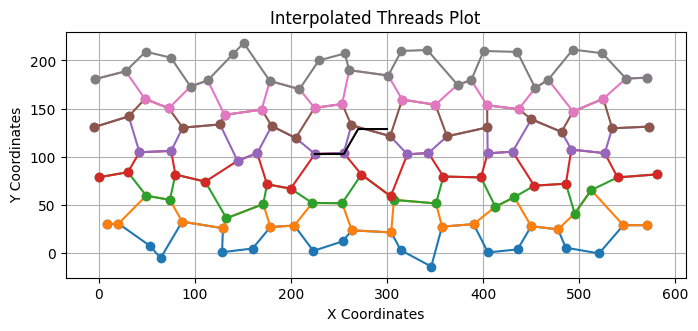

In [13]:
plt.figure(figsize=(8, 8))

for thread_id, points in interpolated_threads.items():
    if points:
        # Separate x and y coordinates for plotting
        x_values, y_values = zip(*points)
        plt.plot(x_values, y_values, marker='o', label=f'Thread {thread_id}')

x_values = [point[0] for point in VisPoints]
y_values = [point[1] for point in VisPoints]

plt.plot(x_values, y_values , label = 'Base Element of Correction', color = 'black')

# Final plot settings
plt.title("Interpolated Threads Plot")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
# plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [14]:
p1,p2 = CurrentThread[2], CurrentThread[3]
math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


17.00000087690022

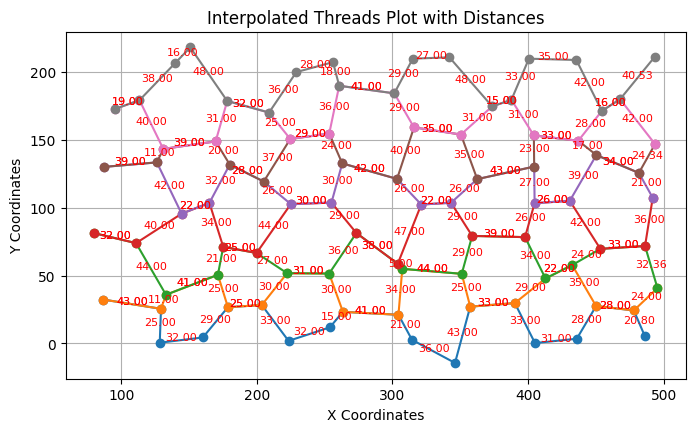

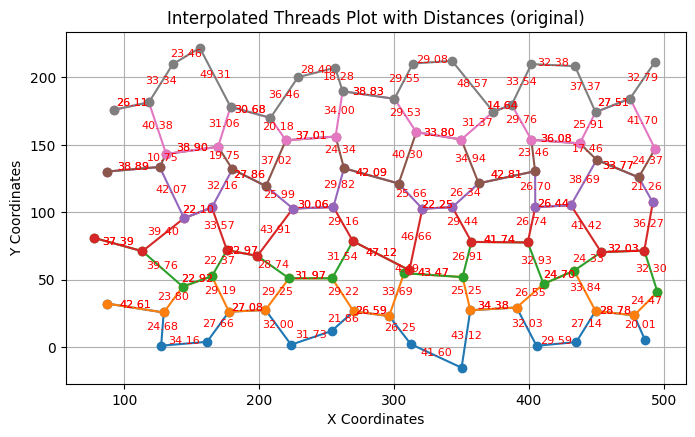

[[133.8043368902339, 51.95355873365871],
 [148.64072209147443, 37.091470247836426],
 [153.48951979598124, 38.311780669785506],
 [169.71327184933946, 57.33255534673162],
 [141.2340989838673, 73.72047480443015],
 [160.1960101197994, 74.92294275495638]]

In [17]:
def delete_rows(threads):
    for thread_num in threads:
        if len(threads[thread_num]) > 1:
            # Remove the first and last element if there are more than one coordinate pair
            threads[thread_num] = threads[thread_num][0:-1]
        elif len(threads[thread_num]) == 1:
            # If there's only one coordinate, remove it
            threads[thread_num] = []
    return threads



interpolated_threads = delete_rows(interpolated_threads)
interpolated_threads_copy = delete_rows(interpolated_threads_copy)

def calculate_distance(p1, p2):
    """Calculate Euclidean distance between two points."""
    return np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

plt.figure(figsize=(8, 8))

for thread_id, points in interpolated_threads.items():
    if points:
        # Separate x and y coordinates for plotting
        x_values, y_values = zip(*points)
        plt.plot(x_values, y_values, marker='o', label=f'Thread {thread_id}')

        # Loop through successive points and calculate distances
        for i in range(1, len(points)):
            p1 = points[i-1]
            p2 = points[i]
            distance = calculate_distance(p1, p2)
            
            # Annotate the distance on the plot
            mid_x = (p1[0] + p2[0]) / 2
            mid_y = (p1[1] + p2[1]) / 2
            plt.text(mid_x, mid_y, f'{distance:.2f}', fontsize=8, color='red', ha='center')


# Final plot settings
plt.title("Interpolated Threads Plot with Distances")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

plt.figure(figsize=(8, 8))

for thread_id, points in interpolated_threads_copy.items():
    if points:
        # Separate x and y coordinates for plotting
        x_values, y_values = zip(*points)
        plt.plot(x_values, y_values, marker='o', label=f'Thread {thread_id}')

        # Loop through successive points and calculate distances
        for i in range(1, len(points)):
            p1 = points[i-1]
            p2 = points[i]
            distance = calculate_distance(p1, p2)
            
            # Annotate the distance on the plot
            mid_x = (p1[0] + p2[0]) / 2
            mid_y = (p1[1] + p2[1]) / 2
            plt.text(mid_x, mid_y, f'{distance:.2f}', fontsize=8, color='red', ha='center')


# Final plot settings
plt.title("Interpolated Threads Plot with Distances (original)")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

[[73.78138091583286, 52.66560627897046], [85.22984070964097, 36.26643653323153], [103.14484021038912, 34.51921205998002], [111.86934717373452, 50.263511925218154], [78.75041978116518, 66.81865021851989], [103.59896096215925, 69.56637989636134]]
[[133.8043368902339, 51.95355873365871], [148.64072209147443, 37.091470247836426], [153.48951979598124, 38.311780669785506], [169.71327184933946, 57.33255534673162], [141.2340989838673, 73.72047480443015], [160.1960101197994, 74.92294275495638]]

In [9]:
def polygon_area(vertices):
    """Calculate the area of a polygon using the Shoelace theorem.
    
    Args:
        vertices (list or array): A list of (x, y) coordinates of the polygon's vertices.
    
    Returns:
        float: The area of the polygon.
    """
    x = np.array([v[0] for v in vertices])
    y = np.array([v[1] for v in vertices])
    
    # Shoelace formula
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

blacklist = []
distances = []
displacements = []
areas = []

for j in range(len(interpolated_threads)):
    thread = interpolated_threads[j+1]
    copied_thread = interpolated_threads_copy[j+1]
    if j < len(interpolated_threads)-1:
        nextthread = interpolated_threads[j+2]
    else:
        nextthread = 0
    for i in range(len(thread)):  # Iterate up to the second to last point
        current_point = thread[i]

        # Check if the current point is already in the blacklist
        p1flag = False
        p2flag = False
        for blacklisted_point in blacklist:
            if points_are_close(current_point, blacklisted_point):
                p1flag = True
            if i < len(thread) - 1:
                next_point = thread[i + 1]
                if points_are_close(next_point, blacklisted_point):
                    p2flag = True

        if p1flag and p2flag:
            continue

        if i < len(thread) - 1:
            next_point = thread[i + 1]
            # If the current point is not in the blacklist, calculate the distance to the next
            distance = calculate_distance(current_point, next_point)
            distances.append(round(distance,1))

        if p1flag:
            continue

        otherpoint = copied_thread[i]
        
        displacements.append(calculate_distance(current_point, otherpoint))

        blacklist.append(current_point)
    if j < len(interpolated_threads)-1:
        if j%2 == 0:
            i=0
            while i < len(thread)//4:
                try:
                    area = polygon_area([thread[4*i+1], thread[4*i+2], thread[4*i+3], thread[4*i+4], nextthread[4*i+3], nextthread[4*i+2]])
                    areas.append(area)
                except:
                    0
                i+=1
        else:
            i=0
            while i < (len(thread)-4)//4:
                try:
                    area = polygon_area([thread[4*i+3], thread[4*i+4], thread[4*i+5], thread[4*i+6], nextthread[4*i+5], nextthread[4*i+4]])
                    areas.append(area)
                except:
                    0
                i+=1



print(distances)
print(displacements)
print(areas)

[30.0, 24.0, 21.0, 25.0, 23.0, 23.0, 19.0, 18.0, 23.0, 22.0, 16.0, 21.0, 17.0, 21.0, 16.0, 32.0, 12.0, 23.0, 21.0, 20.0, 21.0, 21.0, 21.0, 22.0, 20.0, 22.0, 25.0, 19.0, 17.0, 22.0, 18.0, 22.0, 25.0, 12.0, 22.0, 18.0, 19.0, 22.0, 21.0, 16.0, 21.0, 23.0, 22.0, 16.0, 19.0, 22.0, 14.0, 22.0, 21.0, 21.0, 20.0, 14.0, 18.0, 16.0, 16.0, 27.0, 20.0, 15.0, 22.0, 22.0, 14.0, 24.0, 20.0, 15.0, 19.0, 23.0, 18.0, 23.0, 26.0, 19.0, 19.0, 21.0, 17.0, 22.0, 10.0, 25.0, 24.0, 19.0, 21.0, 21.0, 15.0, 28.0, 20.0, 18.0, 23.0, 21.0, 20.0, 24.0, 24.0, 22.0, 20.0, 20.0, 22.0, 15.0, 24.0, 23.0, 22.0, 22.0, 11.0, 30.0, 25.0, 16.0, 22.0, 21.0, 21.0, 19.0, 22.0, 23.0, 22.0, 18.0, 19.0, 16.0, 21.0, 27.0, 18.0, 23.0, 18.0, 27.0, 22.0, 14.0, 17.0, 24.0, 19.0, 34.0, 10.0, 21.0, 16.0, 22.0, 17.0, 29.0, 12.0, 18.0, 16.0, 23.0, 20.0, 17.0, 19.0, 18.0, 22.0, 28.0, 24.0, 16.0, 12.0, 26.0, 11.0, 24.0, 21.0, 25.0, 16.0, 21.0, 26.0, 25.0, 20.0, 22.0, 16.0, 28.0, 19.0, 21.0, 16.0, 25.0, 26.0, 21.0, 25.0, 15.0, 23.0, 16.0, 31.

In [10]:
# mega_distances = distances
# mega_displacements = displacements
# mega_areas = areas

In [11]:
# mega_distances = mega_distances + distances
# mega_displacements = mega_displacements + displacements
# mega_areas = mega_areas + areas

Avg Distance:  20.47991967871486   Sigma:  4.344663715961625  ->  21.2 %
Avg Displacement:  0.832205511356897   Sigma:  0.9301664207394136
Avg Area:  1037.5431254300797   Sigma:  123.4223975188169


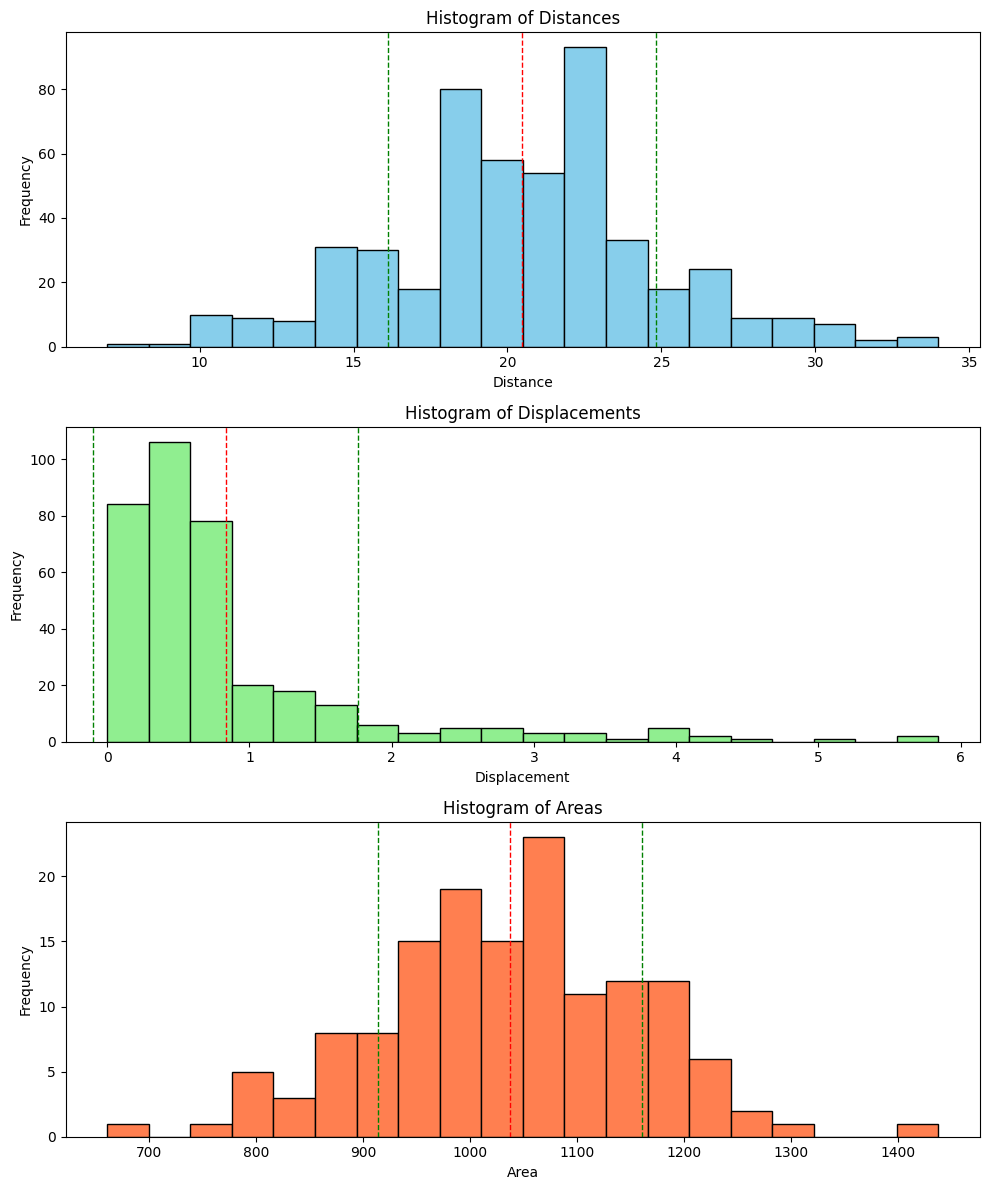

In [12]:
# distances = mega_distances
# displacements = mega_displacements
# areas = mega_areas

import numpy as np
import matplotlib.pyplot as plt

# Assuming distances, displacements, and areas have already been populated

# Calculate statistics for distances
avg_distance = np.mean(distances)
sigma_distance = np.std(distances)

# Calculate statistics for displacements
avg_displacement = np.mean(displacements)
sigma_displacement = np.std(displacements)

# Calculate statistics for areas
avg_area = np.mean(areas)
sigma_area = np.std(areas)

# Print the calculated statistics
print('Avg Distance: ', avg_distance, '  Sigma: ', sigma_distance, ' -> ', round(sigma_distance / avg_distance, 3) * 100, '%')
print('Avg Displacement: ', avg_displacement, '  Sigma: ', sigma_displacement)
print('Avg Area: ', avg_area, '  Sigma: ', sigma_area)

# Create subplots for histograms
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 subplots: for distances, displacements, and areas

# Histogram for distances
ax[0].hist(distances, bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Distances')
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Frequency')
ax[0].axvline(avg_distance, color='red', linestyle='dashed', linewidth=1)  # Mean line
ax[0].axvline(avg_distance + sigma_distance, color='green', linestyle='dashed', linewidth=1)  # +1 Sigma line
ax[0].axvline(avg_distance - sigma_distance, color='green', linestyle='dashed', linewidth=1)  # -1 Sigma line

# Histogram for displacements
ax[1].hist(displacements, bins=20, color='lightgreen', edgecolor='black')
ax[1].set_title('Histogram of Displacements')
ax[1].set_xlabel('Displacement')
ax[1].set_ylabel('Frequency')
ax[1].axvline(avg_displacement, color='red', linestyle='dashed', linewidth=1)  # Mean line
ax[1].axvline(avg_displacement + sigma_displacement, color='green', linestyle='dashed', linewidth=1)  # +1 Sigma line
ax[1].axvline(avg_displacement - sigma_displacement, color='green', linestyle='dashed', linewidth=1)  # -1 Sigma line

# Histogram for areas
ax[2].hist(areas, bins=20, color='coral', edgecolor='black')
ax[2].set_title('Histogram of Areas')
ax[2].set_xlabel('Area')
ax[2].set_ylabel('Frequency')
ax[2].axvline(avg_area, color='red', linestyle='dashed', linewidth=1)  # Mean line
ax[2].axvline(avg_area + sigma_area, color='green', linestyle='dashed', linewidth=1)  # +1 Sigma line
ax[2].axvline(avg_area - sigma_area, color='green', linestyle='dashed', linewidth=1)  # -1 Sigma line

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [13]:
def save_data_to_txt(file_path, distances, displacements, areas):
    with open(file_path, 'w') as f:
        # Write the header
        f.write("Distances\tDisplacements\tAreas\n")
        
        # Get the maximum length of the lists to handle varying lengths
        max_len = max(len(distances), len(displacements), len(areas))
        
        # Write the data rows
        for i in range(max_len):
            dist = distances[i] if i < len(distances) else ''  # If the list is shorter, add an empty space
            disp = displacements[i] if i < len(displacements) else ''
            area = areas[i] if i < len(areas) else ''
            f.write(f"{dist}\t{disp}\t{area}\n")

# Save Data to file
# save_data_to_txt('backup_data_verticemanipulation.txt', distances, displacements, areas)

print(len(distances),len(displacements), len(areas))

498 356 143
